# Arboles de desición

Separa los datos mediante subdivisiones consecutivas, creando subgrupos de 1's o 0's (al menos en su gran mayoría, tampoco es la idea hacer overfitting)
  
![separacion hecha con arbol de desicion](../../assets/decisionTree.png) 
  
![resultado de la separacion hecha con arbol de desicion](../../assets/decisionTreeResult.png) 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("../Social_Network_Ads.csv")

In [35]:
x = df.iloc[:, [2, 3]]
y = df.iloc[:, -1]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state= 0)

In [37]:
# no es necesario realizar el escalado de los datos, pues estos no tienen que trabajar con la distancia, no importa si las variables tienen diferentes escalas
# de hecho es mejor pues así podemos comprender mejor los datos visualmente
# from sklearn.preprocessing import StandardScaler
# ss_x = StandardScaler()
# x_train = ss_x.fit_transform(x_train)
# x_test = ss_x.transform(x_test)

In [38]:
# aplicamos la clasificacion con un arbol de desicion
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier(criterion="entropy",
                                        random_state=0)
clasificador.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
# predecimos las compras
y_pred = clasificador.predict(x_test)

In [40]:
# veo que tal fueron los resultados con la matriz de confusion
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_pred, y_test)
confusionMatrix

array([[62,  3],
       [ 6, 29]])

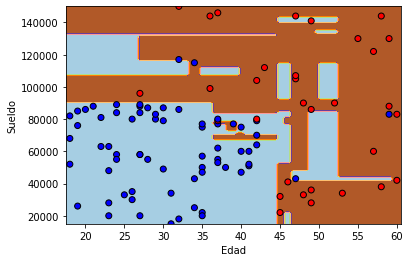

In [44]:
# podemos graficar los resultados con el metodo svm con la misma funcion que instalé antes
# en la clase habia mucho texto, pero encontré esta funcion en sklearn () advertencia, tener cuidado porque está en la rama inestable de sklearn (version 1.1 creo)
# la version estable es 1.0.2 creo, instalé la version inestable pa usar esto
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clasificador,
    x_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    #plot_method="pcolormesh",
    #shading="auto",
    eps=0.5,
)

# lo anterior solo plotea la linea y colorea los espacios, aqui pongo los puntos
# creo una lista de colores a partir de y_test
colores = ["red" if x != 0 else "blue" for x in y_test]
# aqui grafico usando la lista de colores (esdecolors="k" esta de bonito)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], color = colores, edgecolors="k")
plt.xlabel("Edad")
plt.ylabel("Sueldo")
plt.show()

podemos notar un claro sobreajuste de parte del modelo, si bien separó bien el grupo de los azules, tiene unas lagunas azules en la parte de los rojos, las cuales fueron creadas porque en los datos en entrenamiento habian casos raros de puntos azules ahi, pero en los datos de testing no no ayudan, por ejemplo arriba a la derecha hay 2 puntos rojos en una laguna azul, y claramente deberian ser rojos al estar tan arriba y a la derecha